In [5]:
import os, glob 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from sklearn.metrics import classification_report

In [7]:
file_path='/Volumes/MyWorld/Downloads/cell_images'

In [8]:
name_class=os.listdir(file_path)
name_class

['Parasitized', 'Uninfected']

In [9]:
filepaths=list(glob.glob(file_path+'/**/*.*'))
filepaths

['/Volumes/MyWorld/Downloads/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png',
 '/Volumes/MyWorld/Downloads/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png',
 '/Volumes/MyWorld/Downloads/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png',
 '/Volumes/MyWorld/Downloads/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png',
 '/Volumes/MyWorld/Downloads/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png',
 '/Volumes/MyWorld/Downloads/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png',
 '/Volumes/MyWorld/Downloads/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png',
 '/Volumes/MyWorld/Downloads/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png',
 '/Volumes/MyWorld/Downloads/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png',
 '/Volumes/MyWorld/Downloads/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_

In [10]:
labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasi

In [11]:
filepath=pd.Series(filepaths, name='Filepath').astype(str)
labels=pd.Series(labels, name='Label')
data=pd.concat([filepath, labels], axis=1)
data=data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/Volumes/MyWorld/Downloads/cell_images/Uninfec...,Uninfected
1,/Volumes/MyWorld/Downloads/cell_images/Uninfec...,Uninfected
2,/Volumes/MyWorld/Downloads/cell_images/Uninfec...,Uninfected
3,/Volumes/MyWorld/Downloads/cell_images/Uninfec...,Uninfected
4,/Volumes/MyWorld/Downloads/cell_images/Parasit...,Parasitized


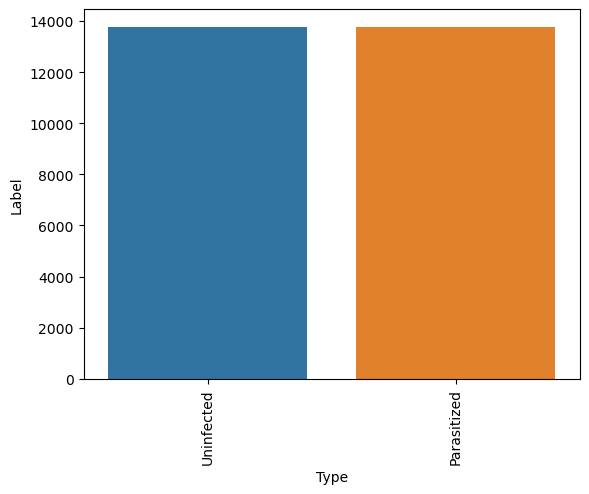

In [12]:
counts=data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [13]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

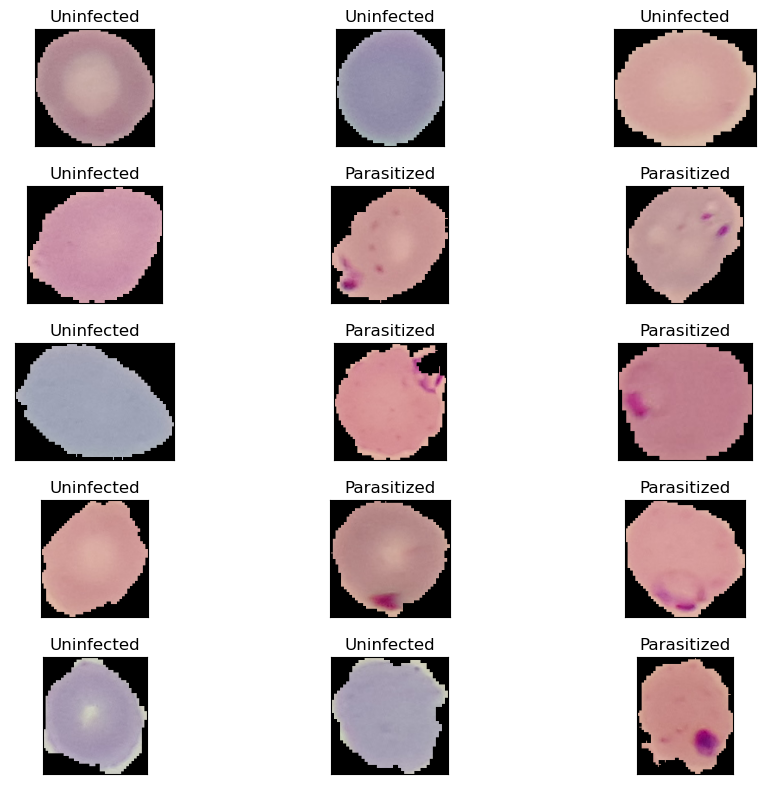

In [14]:
fig, axes=plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [15]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
train_gen=train_datagen.flow_from_dataframe(dataframe=train, x_col='Filepath', y_col='Label', target_size=(100,100), class_mode='categorical', batch_size=32, shuffle=True, seed=42)
valid_gen=train_datagen.flow_from_dataframe(dataframe=test, x_col='Filepath', y_col='Label', target_size=(100,100), class_mode='categorical', batch_size=32, shuffle=False, seed=42)
test_gen=test_datagen.flow_from_dataframe(dataframe=test, x_col='Filepath', y_col='Label', target_size=(100,100), class_mode='categorical', batch_size=32, shuffle=False)



Found 20666 validated image filenames belonging to 2 classes.
Found 6890 validated image filenames belonging to 2 classes.
Found 6890 validated image filenames belonging to 2 classes.


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


In [17]:
import tensorflow as tf
pretrained_model=tf.keras.applications.mobilenet.MobileNet(input_shape=(100,100,3), alpha=1.0, depth_multiplier=1, dropout=0.001, include_top=False, weights='imagenet', input_tensor=None, pooling='max', classes=1000, classifier_activation='softmax')

pretrained_model.trainable=False

2023-01-06 03:29:56.671341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
inputs=pretrained_model.input
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)
outputs=Dense(2, activation='softmax')(x)
model= Model(inputs=inputs, outputs=outputs)

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [82]:
mod=model.fit(train_gen, validation_data=valid_gen, epochs=15)

Epoch 1/15
646/646 [==============================] - 447s 691ms/step - loss: 0.1220 - accuracy: 0.9526 - val_loss: 0.1877 - val_accuracy: 0.9313
Epoch 2/15
646/646 [==============================] - 265s 411ms/step - loss: 0.1127 - accuracy: 0.9573 - val_loss: 0.1802 - val_accuracy: 0.9388
Epoch 3/15
646/646 [==============================] - 267s 414ms/step - loss: 0.1068 - accuracy: 0.9591 - val_loss: 0.1685 - val_accuracy: 0.9373
Epoch 4/15
646/646 [==============================] - 267s 413ms/step - loss: 0.0970 - accuracy: 0.9630 - val_loss: 0.2000 - val_accuracy: 0.9295
Epoch 5/15
646/646 [==============================] - 267s 413ms/step - loss: 0.0940 - accuracy: 0.9651 - val_loss: 0.2178 - val_accuracy: 0.9209
Epoch 6/15
646/646 [==============================] - 268s 415ms/step - loss: 0.0862 - accuracy: 0.9670 - val_loss: 0.1749 - val_accuracy: 0.9411
Epoch 7/15
646/646 [==============================] - 266s 412ms/step - loss: 0.0732 - accuracy: 0.9729 - val_loss: 0.2213 -

In [83]:
results= model.evaluate(test_gen, verbose=0)
print(' Test Loss: {:.5f}'. format(results[0]))
print('Test Accuracy: {:.2f}%'.format(results[1]*100))

 Test Loss: 0.37890
Test Accuracy: 92.38%


In [84]:
#predicting the label of test
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)
#mapping the labels 
labels=(train_gen.class_indices)
labels=dict((v,k)for k,v in labels.items())
pred=[labels[k] for k in pred]

216/216 [==============================] - 66s 307ms/step


In [85]:
y_test=list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

 Parasitized       0.97      0.87      0.92      3456
  Uninfected       0.88      0.97      0.93      3434

    accuracy                           0.92      6890
   macro avg       0.93      0.92      0.92      6890
weighted avg       0.93      0.92      0.92      6890



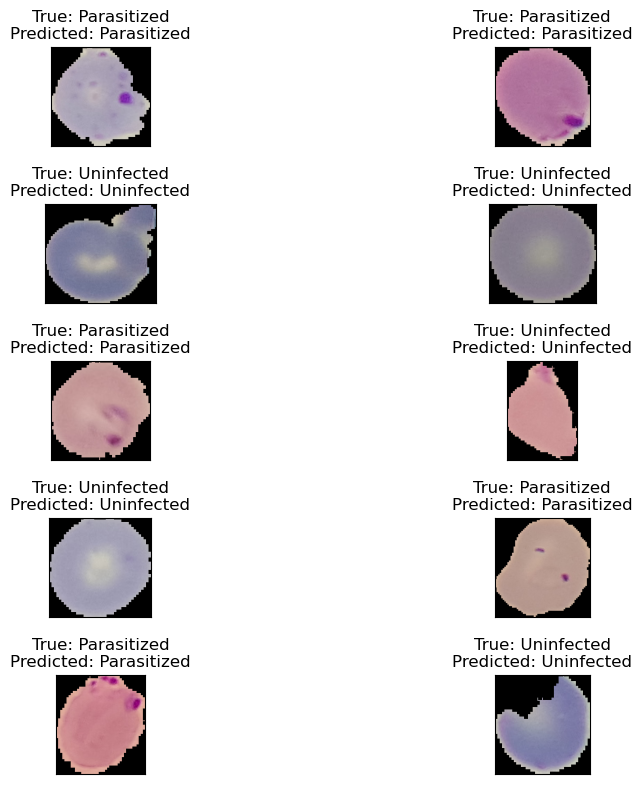

In [86]:
#prediction of the model
fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(12,8), subplot_kw={'xticks':[],'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f'True: {test.Label.iloc[i]}\nPredicted: {pred[i]}')
plt.tight_layout()
plt.show()

In [87]:
#predicting an image which was not included both in test and train 
#importing an uninfected image
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
imge_path='/Volumes/MyWorld/Downloads/C39P4thinF_original_IMG_20150622_114804_cell_39.png'

imge=cv2.imread(imge_path)
imge=cv2.resize(imge, (100, 100))
x=np.expand_dims(imge, axis=0)
x=preprocess_input(x)
result=model.predict(x)
if result[0][0]*100>result[0][1]*100:
    print('Infected with Malaria')
else:
    print('Not Infected')
#print((result*100).astype('int'))


1/1 [==============================] - 0s 21ms/step
Infected with Malaria


In [88]:
model.save('model_mobilenet.h5')

In [89]:
%%writefile app.py
import streamlit as st
import tensorflow as tf 
st.set_option('deprecation.showfileUploaderEncoding', False) #to ignore warnings
@st.cache(allow_output_mutation=True) #to save in cache memory

def load_model():
  model=tf.keras.models.load_model('/Users/apple/Desktop/Python/model_mobilenet.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Malaria Prediction
         """
         )
file = st.file_uploader("Please upload a blood sample image", type=["jpg", "png"])

import cv2
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):
    image=cv2.imread(image_path)
    image=cv2.resize(image, (100, 100))
    x=np.expand_dims(image, axis=0)
    x=preprocess_input(x)
    result=model.predict(x)
    if result[0][0]*100>result[0][1]*100:
        print('Infected with Malaria')
    else:
        print('Not Infected')
    
    return prediction
if file is None:
    st.text('please upload a blood sample for prediction')
else:
    image=Image.open(file)
    st.image(image, use_column_width=True)
    predictions=import_and_predict(image, model)
    string='You are' + predictions
    st.sucess(string)


    

Overwriting app.py


In [ ]:
#size=(100,100)
    #image=ImageOps.fit(image_data, size, Image.ANTIALIAS)
    #img=np.asarray(image)
    #img_reshape=img[np.newaxis,...]
    #prediction=model.predict(img_reshape)
    
    #image=cv2.imread(image_path)
    #image=cv2.resize(image, (100, 100))
    #x=np.expand_dims(image, axis=0)
    #x=preprocess_input(x)
    #result=model.predict(x)
    #if result[0][0]*100>result[0][1]*100:
     #   print('Infected with Malaria')
    #else:
     #   print('Not Infected')
        
        
        
       # string='You are' + predictions
    #st.sucess(string)
    